In [1]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2023, day=25)

from collections import defaultdict

def parses(input):
    graph = defaultdict(list)
    for line in input.strip().split('\n'):
        node, *neighs = line.replace(':','').split()
        for neigh in neighs:
            graph[node].append(neigh)
            graph[neigh].append(node)
    return dict(graph)

# import re
# def parses(input):
#     return [int(re.findall('\d', line)) for line in nput.strip().split('\n')]

data = parses(puzzle.input_data)

In [2]:
sample = parses("""jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr""")

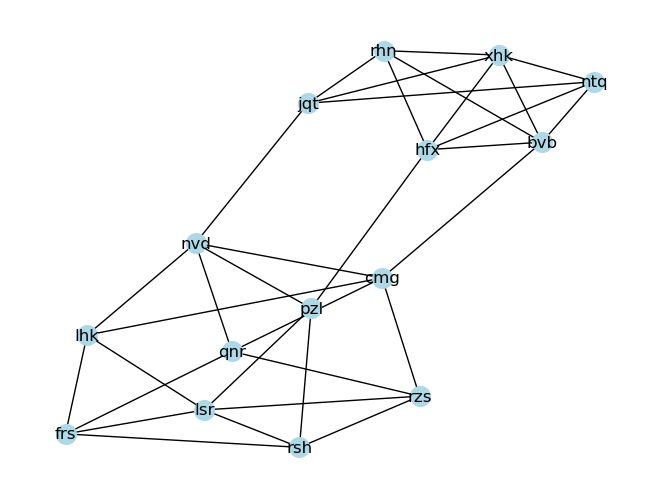

In [21]:
from graphviz import Graph

def viz(graph: dict[str, list[str]], cuts=None) -> None:
    cuts = cuts or []
#     G = Graph(comment='The Graph')
    G = nx.Graph()
    done = set()
    for node, neighbors in graph.items():
#         G.node(node)
        for neigh in neighbors:
            if (node, neigh) not in done:
                color = 'black'
                if (node, neigh) in cuts or (neigh, node) in cuts:
                    color = 'red'
#                 G.edge(node, neigh, color=color, dir=None)
                G.add_edge(node, neigh, color=color, dir=None)
                done |= set([(node,neigh), (neigh,node)])

#     dot.render('graphviz_output', view=True, format='pdf')
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=200)
    plt.show()

viz(sample, [('hfx', 'pzl'), ('bvb', 'cmg'), ('nvd', 'jqt')])


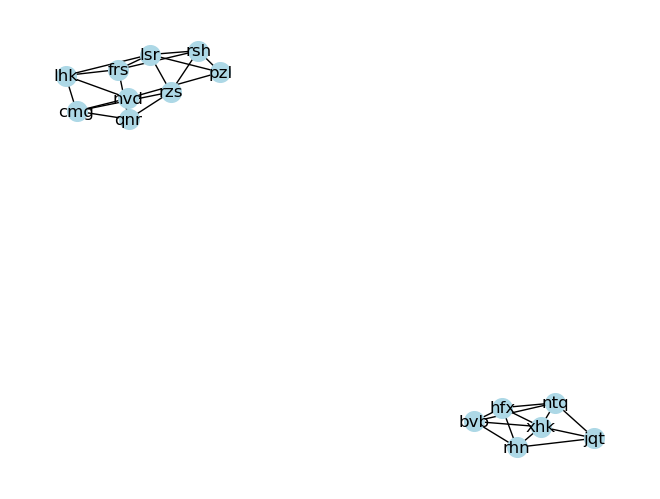

In [36]:
from graphviz import Graph

def viz(graph: dict[str, list[str]], cuts=None) -> None:
    cuts = cuts or []
#     G = Graph(comment='The Graph')
    G = nx.Graph()
    done = set()
    for node, neighbors in graph.items():
#         G.node(node)
        for neigh in neighbors:
            if (node, neigh) not in done:
                if (node, neigh) in cuts or (neigh, node) in cuts:
                    continue
#                 G.edge(node, neigh, color=color, dir=None)
                G.add_edge(node, neigh)
                done |= set([(node,neigh), (neigh,node)])

#     dot.render('graphviz_output', view=True, format='pdf')
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=200)
    plt.show()

viz(sample, [('hfx', 'pzl'), ('bvb', 'cmg'), ('nvd', 'jqt')])


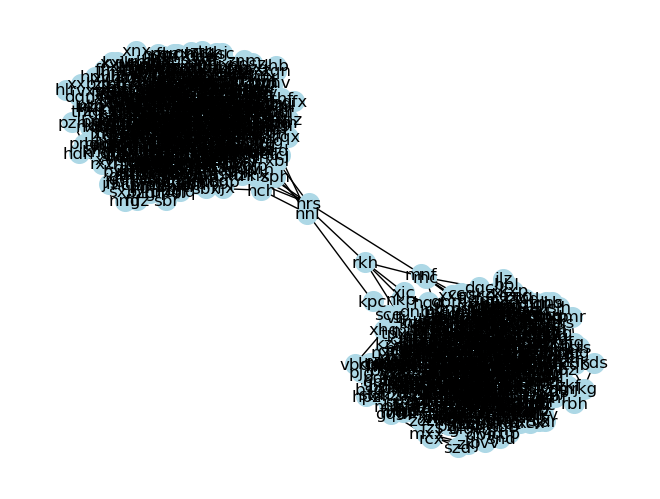

In [59]:
viz(data, [])


In [63]:
import networkx as nx

In [74]:
G = nx.Graph()
for node, neighs in data.items():
    for neigh in neighs:
        G.add_edge(node, neigh)

In [75]:
D = nx.floyd_warshall_numpy(G)

In [77]:
order = np.argsort(D.sum(axis=1))

In [80]:
order

array([564, 322, 138, ..., 606, 724, 553])

In [62]:
len(data)

1568

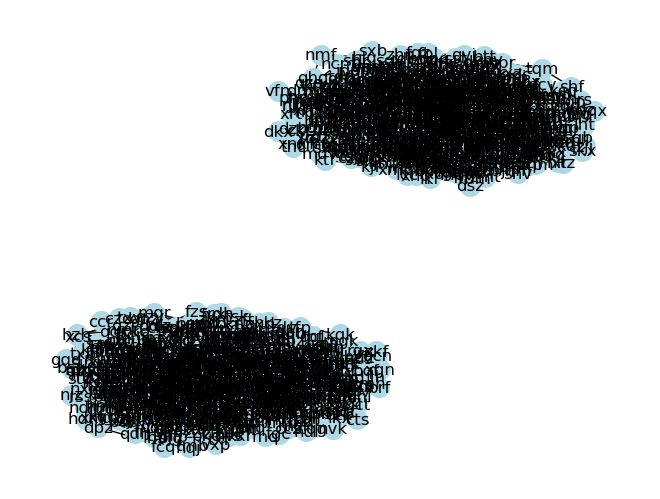

In [38]:
viz(data, [('mnf', 'hrs'), ('kpc', 'nnl'), ('rkh', 'sph')])


In [39]:
cuts = [('mnf', 'hrs'), ('kpc', 'nnl'), ('rkh', 'sph')]

In [56]:
import math
def sizes(graph, cuts):
    cut_graph = defaultdict(list)
    for node, neighs in graph.items():
        for neigh in neighs:
            if (node, neigh) in cuts or (neigh,node) in cuts:
                continue
            cut_graph[node].append(neigh)
    cut_graph = dict(cut_graph)
    stack = list(cut_graph)
    visited = set()
    sizes = []
    for node in cut_graph:
        component = 0
        if node in visited:
            continue
        stack = [node]
        visited.add(node)
        while stack:
            node = stack.pop()
            component += 1
            for neigh in cut_graph[node]:
                if neigh not in visited:
                    visited.add(neigh)
                    stack.append(neigh)
        sizes.append(component)
    assert len(sizes) == 2
    return math.prod(sizes)

In [57]:
sizes(sample, [('hfx', 'pzl'), ('bvb', 'cmg'), ('nvd', 'jqt')])

54

In [58]:
sizes(data, cuts)

614655

In [ ]:
[('mnf', 'hrs'), ('kpc')]

In [29]:
len(data)

1568

In [30]:
from math import comb

In [33]:
from toolz import valmap
sum(valmap(len, data).values())

7006

In [61]:
comb(7006,3)

57289253020

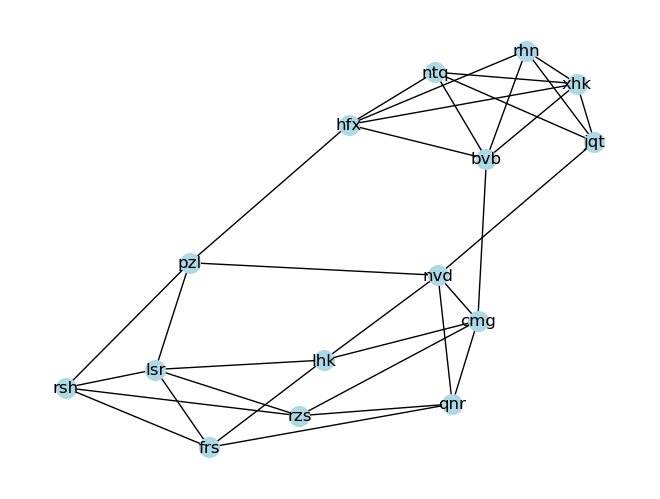

In [99]:
from graphviz import Graph

def viz(graph: dict[str, list[str]], cuts=None) -> None:
    cuts = cuts or []
#     G = Graph(comment='The Graph')
    G = nx.Graph()
    done = set()
    for node, neighbors in graph.items():
#         G.node(node)
        for neigh in neighbors:
            if (node, neigh) not in done:
                if (node, neigh) in cuts or (neigh, node) in cuts:
                    continue
#                 G.edge(node, neigh, color=color, dir=None)
                G.add_edge(node, neigh)
                done |= set([(node,neigh), (neigh,node)])

#     dot.render('graphviz_output', view=True, format='pdf')
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=200)
    plt.show()

viz(sample, [])


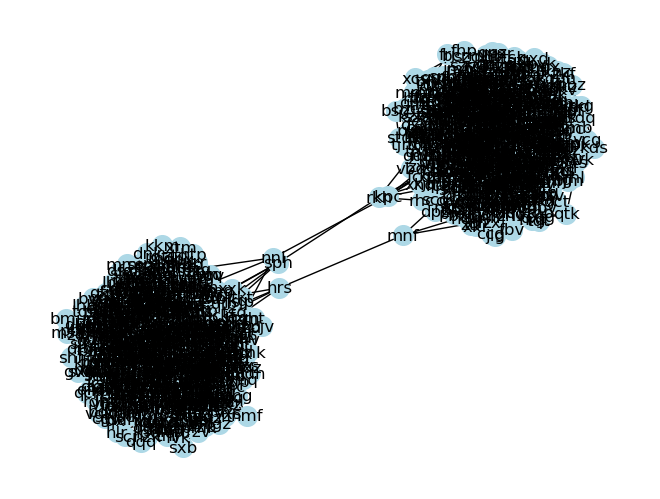

In [100]:
viz(data)

In [114]:
import itertools

15

In [180]:
from tqdm.auto import tqdm

In [197]:
# graph = data
# n_iter = 10

# points = {}
# N = len(graph)
# for k, node in enumerate(graph):
#     points[node] = np.random.uniform(-10,10,size=2)
# #     points[node] = np.array([np.cos(2*np.pi*k/N), np.sin(2*np.pi*k/N)])

# # REPEL = 1
# # PULL = 1 #1e10
# DELTA = 0.01
# K = 1

# for i in tqdm(range(n_iter)):
# #     if i % 10 == 0:
# #     if i == n_iter -1:
#     if True:
#         P = np.vstack(points.values())
#         plt.scatter(*P.T)
#         for node, neighs in graph.items():
#             x1, y1 = points[node]
#             for neigh in neighs:
#                 x2, y2 = points[neigh]
#                 plt.plot([x1,x2], [y1,y2])
#         plt.title(str(i))
#         plt.show()
    
#     forces = defaultdict(lambda: np.zeros((2,)))
#     for n, m in itertools.combinations(graph, 2):
#         u = points[n]-points[m]
#         d = np.linalg.norm(u)
#         forces[n] += u/d * K**2 / d
#         forces[m] += -u/d * K**2 / d
        
#     for node, neighs in graph.items():
#         for neigh in neighs:
#             u = points[node] - points[neigh]
#             d = np.linalg.norm(u)
#             forces[node] += -u/d * d**2 / K
#             forces[neigh] += u/d * d**2 / K

#     delta = DELTA * np.exp(-5*i/n_iter)
    
#     for node in points:
#         points[node] += delta * forces[node]
# #     print(forces)
    


In [198]:
G = nx.Graph()

for node, neighs in data.items():
    for neigh in neighs:
        G.add_edge(node, neigh)

In [199]:
cut, partitions = nx.stoer_wagner(G)

In [200]:
math.prod([len(p) for p in partitions])

614655

In [253]:
from graphviz import Graph

def viz(graph: dict[str, list[str]], cuts=None) -> None:
    cuts = cuts or []
    G = Graph(comment='The Graph')
    G.attr(overlap='true', repulsiveforce='1', K='20')
    done = set()
    for node, neighbors in graph.items():
        G.node(node)
        for neigh in neighbors:
            if (node, neigh) not in done:
                if (node, neigh) in cuts or (neigh, node) in cuts:
                    continue
                G.edge(node, neigh)
                done |= set([(node,neigh), (neigh,node)])

    G.render('graphviz_output', view=True, format='pdf', engine='sfdp')#, args='-Grepulsiveforce=1.5')

In [254]:
viz(data)

In [103]:
n_iter = 100

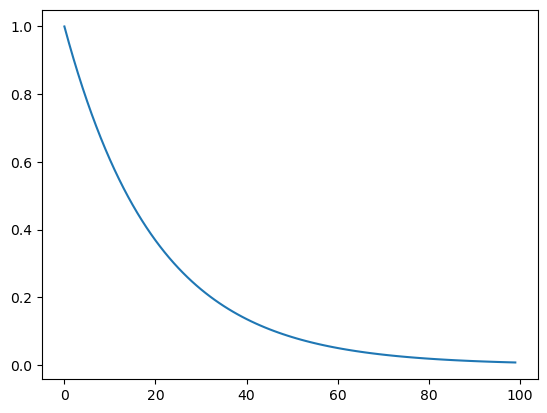

In [111]:

# plt.plot(1/2*(1+np.cos(np.arange(n_iter)/n_iter*np.pi)))
plt.plot()

In [102]:
sample

{'jqt': ['rhn', 'xhk', 'nvd', 'ntq'],
 'rhn': ['jqt', 'xhk', 'bvb', 'hfx'],
 'xhk': ['jqt', 'hfx', 'rhn', 'bvb', 'ntq'],
 'nvd': ['jqt', 'cmg', 'pzl', 'qnr', 'lhk'],
 'rsh': ['frs', 'pzl', 'lsr', 'rzs'],
 'frs': ['rsh', 'qnr', 'lhk', 'lsr'],
 'pzl': ['rsh', 'lsr', 'hfx', 'nvd'],
 'lsr': ['rsh', 'pzl', 'lhk', 'rzs', 'frs'],
 'hfx': ['xhk', 'rhn', 'bvb', 'pzl', 'ntq'],
 'cmg': ['qnr', 'nvd', 'lhk', 'bvb', 'rzs'],
 'qnr': ['cmg', 'nvd', 'rzs', 'frs'],
 'lhk': ['cmg', 'nvd', 'lsr', 'frs'],
 'bvb': ['cmg', 'rhn', 'xhk', 'hfx', 'ntq'],
 'ntq': ['jqt', 'hfx', 'bvb', 'xhk'],
 'rzs': ['qnr', 'cmg', 'lsr', 'rsh']}

In [93]:
# from graphviz import Digraph

# def viz(graph: dict[str, list[str]], cuts=None) -> None:
#     cuts = cuts or []
#     G = Digraph(comment='The Graph')
# #     G = nx.DiGraph()
#     done = set()
#     for node, neighbors in graph.items():
#         G.node(node)
#         for neigh in neighbors:
#             if (node, neigh) not in done:
#                 if (node, neigh) in cuts or (neigh, node) in cuts:
#                     continue
#                 G.edge(node, neigh)
# #                 G.add_edge(node, neigh)
#                 done |= set([(node,neigh), (neigh,node)])

#     G.render('graphviz_output', view=True, format='pdf')
# #     nx.draw(G, with_labels=True, node_color='lightblue', node_size=200)
# #     plt.show()

# viz(data, [])


In [ ]:
comb(len(data))

In [15]:
def solve_a(data):
    pass

In [2]:
def solve_b(data):
    pass